# 均值,方差,标准差 中值 随机变量


# 随机变量
小时候,大家都玩过骰子吧.每次玩掷骰子,结果都在1-6之间.如果我们掷骰子一百万次,每一个数的概率都是1/6.
值和概率的组合我们称为随机变量,而在这个过程中,值的范围,我们称为样本空间.对于骰子,样本空间为{1,2,3,4,5,6}.对于硬币,样本空间为{0,1}

In [96]:
from filterpy.stats import gaussian
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline
import  book_format
book_format.set_style()

65
[0.015 0.062 0.031 0.    0.123 0.031 0.031 0.031 0.538 0.062 0.046
 0.031]


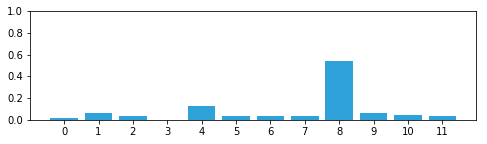

In [62]:
import numpy as np 
data = np.array([1,4,2,0,8,2,2,2,35,4,3,2])
# 计算每个数的比例
sum1 = np.sum(data)
# 比例
belief = data/sum1

print(sum1)
print(belief)
with book_plots.figsize(y=2):
    book_plots.bar_plot(belief)

## 均值

假设有一组学生的身高数据
$$X = \{1.8, 2.0, 1.7, 1.9, 1.6\}$$

现在我们计算他们的平均值:
$$\mu = \frac{1.8 + 2.0 + 1.7 + 1.9 + 1.6}{5} = 1.8$$

求均值的公式也可以这样来写:
$$ \mu = \frac{1}{n}\sum^n_{i=1} x_i$$

numpy中我们可以使用np.mean()快速求出均值

In [63]:
x = [1.8, 2.0, 1.7, 1.9, 1.6]
ret = np.mean(x)
print("平均身高:",ret)

平均身高: 1.8


我们经常要处理类似像上面这样的一组数的集合.如果其中某个数出现的概率比较高,我们可以称这组数是单峰集合,如果有多个数出现的概率同样高,我们则称这组数是多峰集合.
例如:
{1, 2, 2, 2, 3, 4, 4, 4}中2和4的概率相同,所以它是多峰集合
{5, 7, 7, 13}中只有7的概率高,所以它是单峰集合
均值其实就是这个集合的平均值.集合中有一半的数据在均值之下,另外一半在均值之上.


# 随机变量的期望
如果一组数的期望是它的均值,我们就可以认为每个数的概率是相同的
在{1,3,5}中每一个数的概率都是相同的,这组数的期望是多少呢?
它的期望就是(1+3+5)/3=3
但是现实往往是每个数出现的概率不一样.假如1的概率是0.8,3的概率是0.15,5的概率是0.05,那么这组数的期望计算公式如下;
$$\mathbb E[X] = (1)(0.8) + (3)(0.15) + (5)(0.05) = 1.5$$
数学期望的计算公式如下:
$$\mathbb E[X] = \sum_{i=1}^n p_ix_i$$
如果每一个数的概率都相同,则期望的计算公式如下:
$$\mathbb E[X] = \sum_{i=1}^n p_ix_i = \frac{1}{n}\sum_{i=1}^n x_i = \mu_x$$

上面仅仅只有3个数,可能并不能说明问题,下面我们用1000000个数来计算一下

In [68]:
total = 10 
N = 1000000
for r in np.random.rand(N):
    if r <= 0.8: total +=1
    elif r< 0.95: total +=3
    else : total += 5
        
print(total/N)        

1.500494


# 方差
利用上面的公式,我们可以计算出均值,但是它并没有告诉我们所有信息.下面我们来举个例子,假设我们有三个班级的学生身高信息,分别用A,B,C来表示

In [46]:
A = [1.8, 2.0, 1.7, 1.9, 1.6]
B = [2.2, 1.5, 2.3, 1.7, 1.3]
C = [1.8, 1.8, 1.8, 1.8, 1.8]

我们可以用np.mean(x)来计算他们的均值,我们发现它们的均值是相同的

In [69]:
print(np.mean(A),np.mean(B),np.mean(C))

1.8 1.8 1.8


每一个班级的平均身高都是1.8,仔细观察我们会发现B班级身高变化比A班级身高变化要大,而C班级身高没有任何变化  

假设现在学校要采购5000张桌子,而桌子要根据学生的尺寸来定,那么我们该如何来确定这5000张桌子的大小呢?

为了描述数据的变化,我们就需要用到标准差和方差,它的计算公式如下:
$$\mathit{VAR}(X) = \mathbb  E[(X - \mu)^2]$$

我们暂时忽略掉平方,我们会发现方差其实就是X和均值差异的期望,而我们期望的公式$\mathbb E[X] = \sum\limits_{i=1}^n p_ix_i$, 每个数和均值的差异的概率是相同的,所以我们很容易得出方差的公式: 
$$\mathit{VAR}(X) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$  

在前面我们算出了A班级的均值为$\mu = 1.8$  

套用上面的公式,我们来算一下A班级身高的方差:
$$ 
\begin{aligned}
\mathit{VAR}(A) &=\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5} \\
&= \frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5} \\
\mathit{VAR}(A)&= 0.02 \, m^2
\end{aligned}$$

numpy中已经提供好了计算方差的函数:

In [70]:
print(f"{np.var(A):.2f} meters squared")

0.02 meters squared


在这可能有点难以理解,身高的单位是米,而我们计算出来的方差单位是米的平方,为了便于理解我们引入标准差,它的计算公式如下:
$$\sigma = \sqrt{\mathit{VAR}(X)}=\sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

通常我们使用 $\sigma$ 来表示标准差, $\sigma^2$ 表示方差. 简单来说,标准差其实就是方差的平方根

接下来,我们来计算一下A班级的标准差:
$$ 
\begin{aligned}
\sigma_x &=\sqrt{\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5}} \\
&= \sqrt{\frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5}} \\
\sigma_x&= 0.1414
\end{aligned}$$

当然,我们也可以使用`numpy.std(X)`来计算标准差

In [49]:
print(f"标准差: {np.std(A):.4f}")
print(f"方差: {np.std(A)**2:.4f}")

标准差: 0.1414
方差: 0.0200


很显然$0.1414^2=0.02$,这也验证了我们前面的推导.  

那标准差表示的含义是什么? 它告诉我们数据中高度变化的大小. 根据高斯分布的定理,,我们可以认为68%的学生身高在1.66(1.8 - 0.1414) 和 1.94(1.8 + 0.1414)之间.  

A班级总共只有5个学生,我们看到有3个学生身高在这个区间内. 换句话说,在数据样本只有5的情况下,有60%的学生在这个区间内.  
由于样本数量太少,这个概率不会达到68%,只会接近68%.下面我们来计算一下100个学生的概率

In [74]:
from numpy.random import randn
# 创建随机数
data = 1.8 + randn(100)*0.1414
mean = data.mean();
std = data.std()

print("mean=",mean)
print("data=",data)

mean= 1.8066731883877956
data= [1.721 1.71  1.826 1.771 1.594 1.862 1.704 1.623 1.926 1.757 1.932
 1.6   1.84  1.754 1.984 1.825 1.911 1.84  1.805 1.728 1.824 1.608
 2.097 1.59  1.898 1.996 1.7   2.023 1.573 1.777 2.05  1.714 1.839
 1.929 2.017 1.525 1.69  1.567 1.738 1.926 1.72  1.568 1.86  1.746
 1.831 1.701 1.995 1.777 1.726 1.761 1.867 1.822 1.903 1.838 2.094
 1.809 1.68  1.746 1.906 2.127 1.696 1.801 1.827 1.814 1.73  1.901
 1.919 1.476 1.874 1.529 1.753 1.802 1.836 2.07  1.78  1.75  1.904
 1.413 1.794 2.029 1.683 1.822 1.917 1.87  2.256 1.893 1.717 1.945
 1.708 1.643 2.003 1.793 1.692 1.671 1.624 1.769 1.844 2.086 2.069
 1.691]


In [72]:
# 计算满足条件的学生数量
count = np.sum((data> mean-std)& (data<mean+std))
# 计算概率
ratio = count/len(data)
print("概率:",ratio)

概率: 0.68


后面我们会更深层次的来学习它.现在我们先来计算一下B班级的标准差看看:
   $$ B = [2.2, 1.5, 2.3, 1.7, 1.3]$$
它的均值$\mu=1.8$m,所以它的标准差:
$$ 
\begin{aligned}
\sigma_b &=\sqrt{\frac{(2.2-1.8)^2 + (1.5-1.8)^2 + (2.3-1.8)^2 + (1.7-1.8)^2 + (1.3-1.8)^2} {5}} \\
&= \sqrt{0.152} = 0.39 \ m
\end{aligned}$$

我们用numpy来验证一下这个结果:

In [75]:
print("B班级的标准差:",np.std(B))

B班级的标准差: 0.3898717737923585


正如我们所看到的结果,通过这个值我们发现Y的身高变化越大,它的标准差也就越大.  
为了验证我们的这个结论,我们再来计算一下C班级的标准差:
$C = [1.8, 1.8, 1.8, 1.8, 1.8]$

$$ 
\begin{aligned}
\sigma_z &=\sqrt{\frac{(1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2} {5}} \\
&= \sqrt{\frac{0+0+0+0+0}{5}} \\
\sigma_z&= 0.0 \ m
\end{aligned}$$

C班级身高没有变化,所以它的标准差为0

In [76]:
print("C班级的标准差:",np.std(C))

C班级的标准差: 0.0


在我们继续学习之前,我需要说明一下,当前情况下,我们仅仅考虑了学校全为男生,或者全为女生的情况.因为男生的身高通常比女生要高.

# 为什么是差异的平方
为什么计算差异的时候,我们需要用到平方.这里我给大家举个例子:
$$X = [3,-3,3,-3]$$
它的均值$\mu=0$
我们用图示的显示把数据渲染出来:

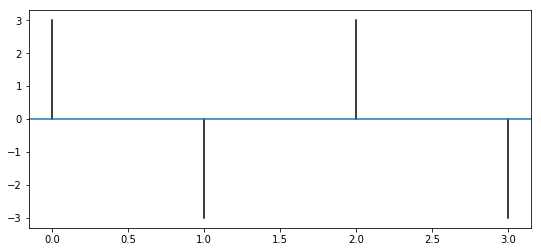

In [78]:
X = [3, -3, 3, -3]
mean = np.average(X)
for i  in range(len(X)):
    plt.plot([i,i],[mean,X[i]],color='k')

plt.axhline(mean)
plt.show()    

然后我们尝试计算一下他们的差异:
    $$\frac{(3-0) + (-3-0) + (3-0) + (-3-0)}{4} = 0$$
这很显然是不对的.这组数的方差肯定是大于0的.  
也许我们可以使用绝对值的形式来计算,那它的结果是$12/4=3$,这显然也不对,所有的值在3的附近变化.

假设我们有另外一组数:$Y=[6,-2,-3,1]$,我们同样得到$12/4=3$  
Y的数据很显然要比X数据波动较大. 如果我们使用平方的形式来计算Y的方差,它的值为3.5,这显然反应Y的数据波动较大

这很显然不是一个很好的论证,我们只是在这里说明为什么我们要用到平方.

但是使用平方其实也会带来一些问题.例如我们的数据中有一些非常大的异常值.

In [79]:
# 数据中有一个异常值100
X = [1,-1,1,-2,-1,2,1,2,-1,1,-1,2,1,-2,100]
print("包100非常大的数:",np.var(X))
print("不包含100非常大的数:",np.var(X[:-1]))

包100非常大的数: 621.4488888888889
不包含100非常大的数: 2.0255102040816326


# 高斯函数
在高斯函数中,并没有非常大的离群值,我们通过高斯函数公式,仅仅利用几个简单的数字就可以描述一个非常庞大的数据集.  
高斯函数用一种单峰,连续的方式来表示概率,它可以模拟很多现实生活中的情形.

$$ 
f(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\big [{-\frac{(x-\mu)^2}{2\sigma^2} }\big ]
$$

下面我们用图表的形式来显示一下高斯函数:

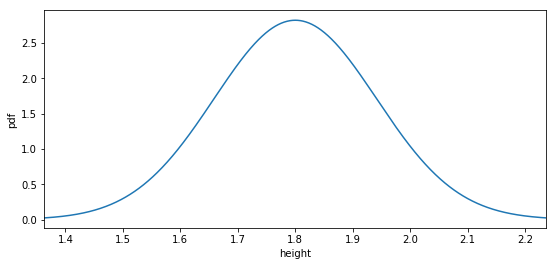

In [90]:
from filterpy.stats import plot_gaussian_pdf
plot_gaussian_pdf(mean=1.8,variance=0.1414**2,xlabel="height",ylabel="pdf")

这条弧线描述的就是概率密度(probability density function),可以简称:pdf.
通过这条曲线我们可以看出:平均身高为1.8米,身高接近1.8米的可能性比1.7米大，比1.9米和1.4米的可能性也大得多。

下面我们可以来计算累积概率分布:

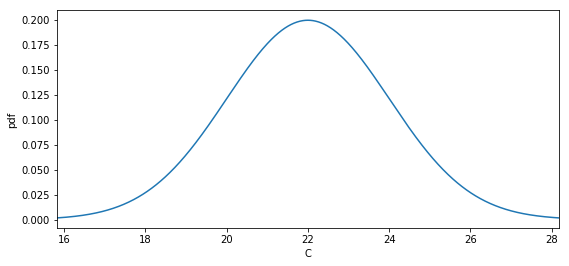

In [91]:
from filterpy.stats import norm_cdf
plot_gaussian_pdf(mean=22,variance=2**2,xlabel="C",ylabel="pdf")

In [92]:
print("20-22之间的温度概率:",norm_cdf((20,22),22,4))
print("22-24之间的温度概率:",norm_cdf((22,24),22,4))

20-22之间的温度概率: 0.3413447460685429
22-24之间的温度概率: 0.3413447460685429


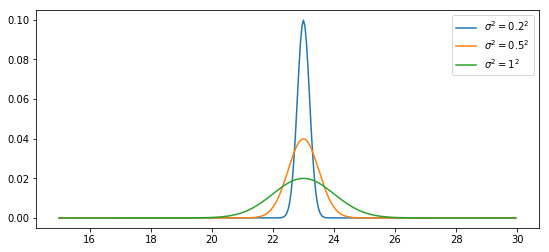

In [99]:
xs = np.arange(15,30,0.05)

plt.plot(xs,gaussian(xs,23,0.2**2),label="$\sigma^2 = 0.2^2$")
plt.plot(xs,gaussian(xs,23,0.5**2),label="$\sigma^2 = 0.5^2$")
plt.plot(xs,gaussian(xs,23,1**2),label="$\sigma^2 = 1^2$")
plt.legend()

通过上面这个例子,我们再次可以看错,方差越小,数据波动越小,越集中

### 68-95-99.7法则
68%的数据集中在均值附近标准差($\pm1\sigma$)的范围内,95%的数据集中在均值($\pm2\sigma$)的范围内,99.7%的数据集中在均值($\pm3\sigma$)的范围内

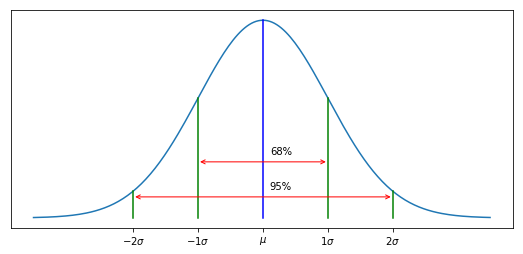

In [54]:
from kf_book.gaussian_internal import display_stddev_plot
display_stddev_plot()

## 交互式的高斯
为了便于大家更加升入的理解高斯分布,下面我们来绘制一个可动态调整的高斯函数

In [55]:
import math
from ipywidgets import interact,FloatSlider

def plt_g(mu,variance):
    plt.figure()
    xs = np.arange(2,8,0.01)
    ys = gaussian(xs,mu,variance)
    plt.plot(xs,ys)
    plt.ylim(0,0.04)
    
interact(plt_g,mu=FloatSlider(value=5,min=3,max=7),variance=FloatSlider(value=0.03,min=0.01,max=1.))    

interactive(children=(FloatSlider(value=5.0, description='mu', max=7.0, min=3.0), FloatSlider(value=0.03, desc…

<function __main__.plt_g(mu, variance)>

# 高斯运算
高斯的乘法:
    $$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\
\sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} 
\end{aligned}$$
高斯加法: 
    
$$\begin{gathered}\mu = \mu_1 + \mu_2 \\
\sigma^2 = \sigma^2_1 + \sigma^2_2
\end{gathered}$$

在下面这里,我们通过一个简单的例子来演示一下高斯的乘法

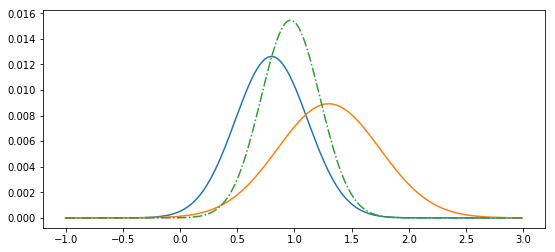

In [104]:
x = np.arange(-1,3,0.01)

g1 = gaussian(x,mean=0.8,var=0.1)
g2 = gaussian(x,mean=1.3,var=0.2)

plt.plot(x,g1,x,g2)

# 高斯乘法
g  = g1*g2
# 对数据进行归一化处理
g = g/np.sum(g)
plt.plot(x,g,ls="-.")

从上面的运算结果我们可以看出,蓝色的高斯函数乘以橙色的高斯函数,输出绿色虚线的高斯函数,输出的结果一定是在两个之间,并且结果数据集中在均值附近